In [227]:
in_mobility = pd.read_csv("region/2020_IN_Region_Mobility_Report.csv")

In [65]:
state_wise = pd.read_csv("state_wise_daily.csv")
state_wise['Date'] = pd.to_datetime(state_wise['Date'])
state_wise = state_wise[state_wise['Status'] == 'Confirmed']
state_wise.drop('TT',axis=1,inplace=True)
state_wise.drop('UN',axis=1,inplace=True)
state_wise.drop('LA',axis=1,inplace=True)

In [44]:
states_short = ['AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB']

abbr_to_state = dict(zip(states_short,in_mobility['sub_region_1'].unique()[1:].tolist()))
abbr_to_state

{'AN': 'Andaman and Nicobar Islands',
 'AP': 'Andhra Pradesh',
 'AR': 'Arunachal Pradesh',
 'AS': 'Assam',
 'BR': 'Bihar',
 'CH': 'Chandigarh',
 'CT': 'Chhattisgarh',
 'DN': 'Dadra and Nagar Haveli',
 'DD': 'Daman and Diu',
 'DL': 'Delhi',
 'GA': 'Goa',
 'GJ': 'Gujarat',
 'HR': 'Haryana',
 'HP': 'Himachal Pradesh',
 'JK': 'Jammu and Kashmir',
 'JH': 'Jharkhand',
 'KA': 'Karnataka',
 'KL': 'Kerala',
 'LD': 'Lakshadweep',
 'MP': 'Madhya Pradesh',
 'MH': 'Maharashtra',
 'MN': 'Manipur',
 'ML': 'Meghalaya',
 'MZ': 'Mizoram',
 'NL': 'Nagaland',
 'OR': 'Odisha',
 'PY': 'Puducherry',
 'PB': 'Punjab',
 'RJ': 'Rajasthan',
 'SK': 'Sikkim',
 'TN': 'Tamil Nadu',
 'TG': 'Telangana',
 'TR': 'Tripura',
 'UP': 'Uttar Pradesh',
 'UT': 'Uttarakhand',
 'WB': 'West Bengal'}

In [68]:
# state_wise.drop(['Date_YMD','Status','LA'],axis=1,inplace=True)
# state_wise
state_wise = state_wise.melt(id_vars=["Date","Date_YMD","Status"], 
        var_name="State", 
        value_name="new cases")#['State'].unique()

In [74]:
# pd.merge(state_wise)
state_wise = state_wise.replace({'State':abbr_to_state})

In [78]:
state_wise.drop(['Date_YMD','Status'],axis=1,inplace=True)
state_wise

,Date,State,new cases
0,2020-03-14,Andaman and Nicobar Islands,0
1,2020-03-15,Andaman and Nicobar Islands,0
2,2020-03-16,Andaman and Nicobar Islands,0
3,2020-03-17,Andaman and Nicobar Islands,0
4,2020-03-18,Andaman and Nicobar Islands,0
...,...,...,...
14467,2021-04-15,West Bengal,6769
14468,2021-04-16,West Bengal,6910
14469,2021-04-17,West Bengal,7713
14470,2021-04-18,West Bengal,8419


In [230]:
in_mobility = in_mobility[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline',
                           'grocery_and_pharmacy_percent_change_from_baseline',
                           'parks_percent_change_from_baseline',
                           'transit_stations_percent_change_from_baseline',
                           'workplaces_percent_change_from_baseline',
                           'residential_percent_change_from_baseline']]

in_mobility['date'] = pd.to_datetime(in_mobility['date'])

in_mobility = in_mobility[in_mobility['sub_region_1'].notna()]

in_mobility.columns = ['State', 'Date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

in_mobility = in_mobility.set_index('Date')

in_mobility_check = in_mobility.groupby(by=[in_mobility.index.get_level_values(0), 'State']).max().reset_index(level='State')

combined_summed = pd.merge(in_mobility_check.reset_index(), state_wise.reset_index(), on=['Date','State'])

In [232]:
scaled_combined_summed = combined_summed.copy()

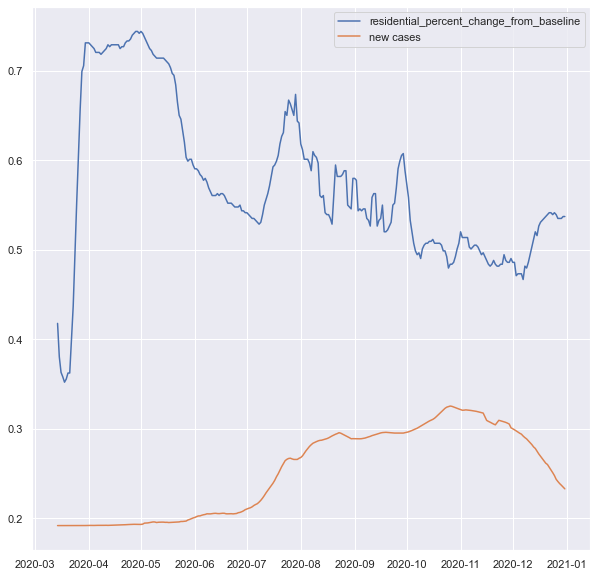

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'new cases']

scaled_combined_summed[cols] = scaler.fit_transform(scaled_combined_summed[cols])

def compare(dataframe, fields):
    fig, ax = plt.subplots(figsize=(10,10))
    for f in fields:
        data = dataframe[f]
        data = data.rolling(7, min_periods=1).mean()
        ax.plot(dataframe["Date"], data, label=f)
    ax.legend(loc="best")


compare(scaled_combined_summed[scaled_combined_summed['State']=='West Bengal'], [
#                     "retail_and_recreation_percent_change_from_baseline",
#                   "grocery_and_pharmacy_percent_change_from_baseline",
#                   "parks_percent_change_from_baseline","transit_stations_percent_change_from_baseline",
#                   "workplaces_percent_change_from_baseline",
                  "residential_percent_change_from_baseline", "new cases"])

In [234]:
scaled_combined_summed#['new_cases']

,Date,State,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,new cases
0,2020-03-14,Andaman and Nicobar Islands,0.201018,0.103253,0.179584,0.136585,0.228986,0.373134,0.192013
1,2020-03-14,Andhra Pradesh,0.241730,0.141443,0.206049,0.149593,0.223188,0.343284,0.192045
2,2020-03-14,Arunachal Pradesh,0.256997,0.124470,0.241966,0.136585,0.272464,0.328358,0.192013
3,2020-03-14,Assam,0.254453,0.142857,0.230624,0.193496,0.275362,0.328358,0.192013
4,2020-03-14,Bihar,0.272265,0.169731,0.258979,0.185366,0.255072,0.447761,0.192013
...,...,...,...,...,...,...,...,...,...
10518,2020-12-31,Telangana,0.254453,0.256011,0.232514,0.182114,0.249275,0.447761,0.205487
10519,2020-12-31,Tripura,0.229008,0.186704,0.317580,0.281301,0.313043,0.447761,0.192208
10520,2020-12-31,Uttar Pradesh,0.284987,0.322489,0.327032,0.203252,0.304348,0.567164,0.192013
10521,2020-12-31,Uttarakhand,0.368957,0.248939,0.446125,0.318699,0.324638,0.537313,0.201883


In [235]:
combined_summed.to_csv('state_mobility_cases_agg=max_2020.csv', index=False)